In [1]:
#import graphviz
import librosa
import librosa.display
import numpy as np
import pickle
import random
import glob
import cv2
import re
import matplotlib.pyplot as plt

import tensorflow.keras
from tensorflow.python.keras import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
%cd ../data/img/melspec
melspecs = [re.search('.+?(?=\.png)', x).group(0)
              for x in glob.iglob('*.png')]

C:\Users\lexokan\Dropbox\R and Python\generativeMusic\data\img\melspec


In [3]:
# Read in spectrograms in color
# Maybe reshape to be 128x1600
mels = []
for i in range(len(melspecs)): 
    mels.append(cv2.imread(melspecs[i]+'.png'))
mels = np.array(mels)

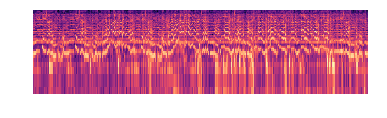

(118, 400, 1600, 3)


In [10]:
plt.axis('off')
plt.imshow(cv2.cvtColor(mels[0], cv2.COLOR_BGR2RGB))
plt.show()

print(mels.shape)

In [ ]:
frac = 0.80
split = int(np.floor(len(mels) * frac))
random.shuffle(df)

train = df[:split]
test = df[split:]

_, X_train, y_train = zip(*train)
_, X_test, y_test = zip(*test)

# Still use 128x128 spectrograms for the RNN 

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 128) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128) ) for x in X_test])

# One-Hot encoding for classes
y_train = np.array(tensorflow.keras.utils.to_categorical(y_train, 4))
y_test = np.array(tensorflow.keras.utils.to_categorical(y_test, 4))